# 군집화(Clustering) - K-Means Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Iris 데이터로 군집화
- target data(y값)을 보지 않고 군집화를 했을 때, 기존 target data와의 비교

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sl', 'sw', 'pl', 'pw'])
irisDF.head(3)

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### K-Means 모델 생성/학습

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=2021) # kmeans 선택
kmeans.fit(irisDF) # 훈련

KMeans(n_clusters=3, random_state=2021)

In [5]:
kmeans.labels_ # 훈련결과

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
irisDF['target'] = iris.target      # 실제 target class
irisDF['cluster'] = kmeans.labels_  # Clustering 결과 도출된 class
irisDF.head()

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [9]:
# 실제 결과와 비교해보기
clustering_result = irisDF.groupby(['target', 'cluster']).count()
clustering_result.head()

sl  sw  pl  pw
target cluster                
0      1        50  50  50  50
1      0        48  48  48  48
       2         2   2   2   2
2      0        14  14  14  14
       2        36  36  36  36

## 군집화 결과를 차원 축소하여 시각화

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [11]:
irisDF['pca_x'] = iris_pca[:, 0]
irisDF['pca_y'] = iris_pca[:, 1]
irisDF.head()

,sl,sw,pl,pw,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835


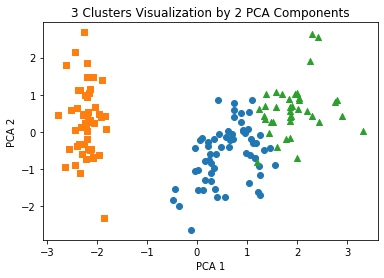

In [12]:
markers = ['s', 'o', '^']

for i, marker in enumerate(markers):
    x_axis_data = 
    y_axis_data = 

cls0_index = irisDF[irisDF.cluster == 0].index
cls1_index = irisDF[irisDF.cluster == 1].index
cls2_index = irisDF[irisDF.cluster == 2].index

plt.scatter(x=irisDF.loc[cls0_index, 'pca_x'],  
            y=irisDF.loc[cls0_index, 'pca_y'], 
            marker='o')
plt.scatter(x=irisDF.loc[cls1_index, 'pca_x'],  
            y=irisDF.loc[cls1_index, 'pca_y'], 
            marker='s')
plt.scatter(x=irisDF.loc[cls2_index, 'pca_x'],  
            y=irisDF.loc[cls2_index, 'pca_y'], 
            marker='^')

plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

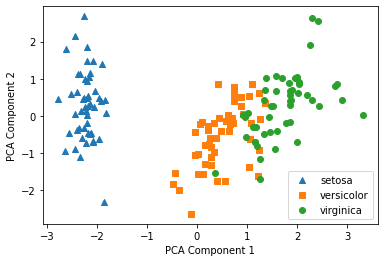

In [14]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF.target==i]['pca_x']
    y_axis_data = irisDF[irisDF.target==i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- 비교 그림 그려볼 것

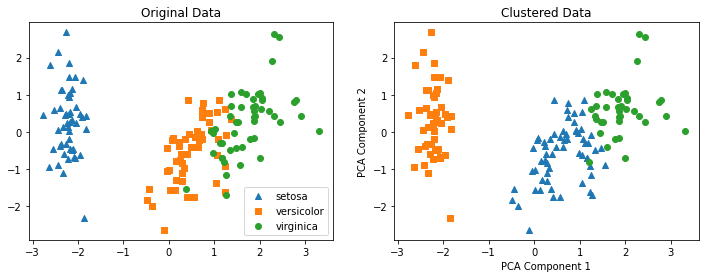

In [50]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = irisDF[irisDF[column]==i]['pca_x']
        y_axis_data = irisDF[irisDF[column]==i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data,
        marker=marker, label=iris.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.legend()
    else:
        ax.set_title('Clustered Data')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Clustering 알고리즘 테스트를 위한 데이터 생성

In [35]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=3, random_state=2021)
print(X.shape, y.shape)

(200, 2) (200,)


In [36]:
# target의 분포
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [37]:
clusterDF = pd.DataFrame(X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-2.870830,-0.543596,1
1,9.691286,-14.448113,2
2,9.583819,-11.116303,2
3,6.980622,-9.033997,2
4,-6.296733,2.696087,1


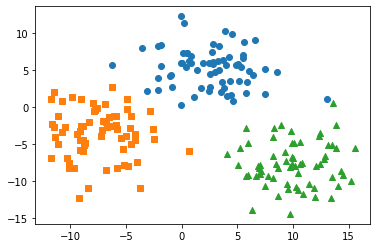

In [38]:
markers=['o', 's', '^', 'P','D','H','x']

target_list = np.unique(y)
for target in target_list:
    target_cluster = clusterDF[clusterDF.target == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
                marker=markers[target])
plt.show()

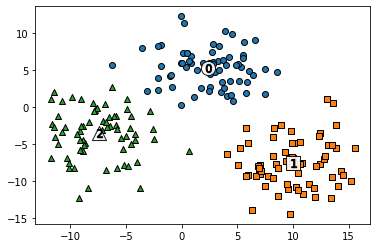

In [39]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, random_state=2021)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()